In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from patsy import dmatrices
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
data=pd.read_json('train.json')

In [4]:
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [5]:
levels=['interest_level','bedrooms','bathrooms','price','display_address','features','photos','manager_id','description','latitude','longitude','created']

In [6]:
level1=data[levels]

In [7]:
level1.head(20)

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,medium,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
10000,low,2,1.0,5465,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",[https://photos.renthop.com/2/7150865_be3306c5...,7533621a882f71e25173b27e3139d83d,,40.7947,-73.9667,2016-06-12 12:19:27
100004,high,1,1.0,2850,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",[https://photos.renthop.com/2/6887163_de85c427...,d9039c43983f6e564b1482b273bd7b01,"Top Top West Village location, beautiful Pre-w...",40.7388,-74.0018,2016-04-17 03:26:41
100007,low,1,1.0,3275,East 49th Street,"[Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6888711_6e660cee...,1067e078446a7897d2da493d2f741316,Building Amenities - Garage - Garden - fitness...,40.7539,-73.9677,2016-04-18 02:22:02
100013,low,4,1.0,3350,West 143rd Street,[Pre-War],[https://photos.renthop.com/2/6934781_1fa4b41a...,98e13ad4b495b9613cef886d79a6291f,Beautifully renovated 3 bedroom flex 4 bedroom...,40.8241,-73.9493,2016-04-28 01:32:41
100014,medium,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47
100016,low,2,1.0,3600,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",[https://photos.renthop.com/2/6930771_7e3622b6...,01287194f20de51872e81f660def4784,Stunning unit with a great location and lots o...,40.8012,-73.9660,2016-04-27 03:19:56
100020,low,1,2.0,5645,West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",[https://photos.renthop.com/2/6867392_b18283f6...,e6472c7237327dd3903b3d6f6a94515a,"This huge sunny ,plenty of lights 1 bed/2 bath...",40.7427,-73.9957,2016-04-13 06:01:42
100026,medium,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35
100027,low,4,2.0,5800,522 E 11th,"[Dishwasher, Hardwood Floors]",[https://photos.renthop.com/2/6814332_e19a8552...,23a01ea7717b38875f5b070282d1b9d2,This is a spacious four bedroom with every bed...,40.7278,-73.9808,2016-04-02 02:58:15


### We are going to convert the medium category variable to high category variable, so that we have only two categories ie Low and high

In [8]:
level2=level1[level1['interest_level']=='medium']
level2.shape[0]
level2

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,medium,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
100014,medium,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47
100026,medium,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35
100051,medium,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00
100063,medium,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45
10007,medium,4,2.0,7400,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7,SPRAWLING 2 BEDROOM FOUND! ENJOY THE LUXURY OF...,40.7391,-73.9936,2016-06-07 04:39:56
100075,medium,1,1.0,2295,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e,Don't miss out on this fantastic apartment.......,40.7728,-73.9502,2016-04-25 02:29:50
100083,medium,0,1.0,2750,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1,Enjoy the Upper West Side life-style! This ap...,40.7897,-73.9760,2016-04-21 02:17:28
100084,medium,2,1.0,3500,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c,"--Prime location of the Upper West Side, this ...",40.7902,-73.9678,2016-04-04 04:10:01
10010,medium,0,1.0,2396,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2,Prime Location!! This Luxury Chelsea building ...,40.7530,-73.9959,2016-06-29 04:08:35


In [9]:
level2.interest_level='high'

C:\Anaconda\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
level2

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,high,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
100014,high,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47
100026,high,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35
100051,high,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00
100063,high,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45
10007,high,4,2.0,7400,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7,SPRAWLING 2 BEDROOM FOUND! ENJOY THE LUXURY OF...,40.7391,-73.9936,2016-06-07 04:39:56
100075,high,1,1.0,2295,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e,Don't miss out on this fantastic apartment.......,40.7728,-73.9502,2016-04-25 02:29:50
100083,high,0,1.0,2750,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1,Enjoy the Upper West Side life-style! This ap...,40.7897,-73.9760,2016-04-21 02:17:28
100084,high,2,1.0,3500,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c,"--Prime location of the Upper West Side, this ...",40.7902,-73.9678,2016-04-04 04:10:01
10010,high,0,1.0,2396,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2,Prime Location!! This Luxury Chelsea building ...,40.7530,-73.9959,2016-06-29 04:08:35


In [11]:
level3=level1.drop(level1[level1['interest_level']=='medium'].index)

In [12]:
level3

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10000,low,2,1.0,5465,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",[https://photos.renthop.com/2/7150865_be3306c5...,7533621a882f71e25173b27e3139d83d,,40.7947,-73.9667,2016-06-12 12:19:27
100004,high,1,1.0,2850,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",[https://photos.renthop.com/2/6887163_de85c427...,d9039c43983f6e564b1482b273bd7b01,"Top Top West Village location, beautiful Pre-w...",40.7388,-74.0018,2016-04-17 03:26:41
100007,low,1,1.0,3275,East 49th Street,"[Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6888711_6e660cee...,1067e078446a7897d2da493d2f741316,Building Amenities - Garage - Garden - fitness...,40.7539,-73.9677,2016-04-18 02:22:02
100013,low,4,1.0,3350,West 143rd Street,[Pre-War],[https://photos.renthop.com/2/6934781_1fa4b41a...,98e13ad4b495b9613cef886d79a6291f,Beautifully renovated 3 bedroom flex 4 bedroom...,40.8241,-73.9493,2016-04-28 01:32:41
100016,low,2,1.0,3600,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",[https://photos.renthop.com/2/6930771_7e3622b6...,01287194f20de51872e81f660def4784,Stunning unit with a great location and lots o...,40.8012,-73.9660,2016-04-27 03:19:56
100020,low,1,2.0,5645,West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",[https://photos.renthop.com/2/6867392_b18283f6...,e6472c7237327dd3903b3d6f6a94515a,"This huge sunny ,plenty of lights 1 bed/2 bath...",40.7427,-73.9957,2016-04-13 06:01:42
100027,low,4,2.0,5800,522 E 11th,"[Dishwasher, Hardwood Floors]",[https://photos.renthop.com/2/6814332_e19a8552...,23a01ea7717b38875f5b070282d1b9d2,This is a spacious four bedroom with every bed...,40.7278,-73.9808,2016-04-02 02:58:15
100030,low,0,1.0,1950,York Avenue,[],[https://photos.renthop.com/2/6869199_06b2601f...,e32475a6134d6d18279946b7b20a0f12,New to the market! Spacious studio located in ...,40.7769,-73.9467,2016-04-14 01:10:30
10004,low,1,1.0,1675,W. 173rd Street,"[prewar, dishwasher, HIGHRISE, ROOFDECK, EAT I...",[https://photos.renthop.com/2/7102986_ca6af538...,2dee0868ac01057760055b856e66e942,Check out this one bedroom apartment in a grea...,40.8448,-73.9396,2016-06-03 03:21:22
100044,high,2,1.0,3000,E 38th St,"[Doorman, Elevator, Laundry in Building, No Fee]",[https://photos.renthop.com/2/6895442_34d617a5...,537e06890f6a86dbb70c187db5be4d55,***LOW FEE. Beautiful CHERRY OAK WOODEN FLOORS...,40.7488,-73.9770,2016-04-19 05:37:25


In [13]:
level4= [level2,level3]

In [14]:
result = pd.concat(level4)

### This will be our final dataset

In [15]:
result

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,high,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
100014,high,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47
100026,high,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35
100051,high,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00
100063,high,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45
10007,high,4,2.0,7400,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7,SPRAWLING 2 BEDROOM FOUND! ENJOY THE LUXURY OF...,40.7391,-73.9936,2016-06-07 04:39:56
100075,high,1,1.0,2295,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e,Don't miss out on this fantastic apartment.......,40.7728,-73.9502,2016-04-25 02:29:50
100083,high,0,1.0,2750,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1,Enjoy the Upper West Side life-style! This ap...,40.7897,-73.9760,2016-04-21 02:17:28
100084,high,2,1.0,3500,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c,"--Prime location of the Upper West Side, this ...",40.7902,-73.9678,2016-04-04 04:10:01
10010,high,0,1.0,2396,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2,Prime Location!! This Luxury Chelsea building ...,40.7530,-73.9959,2016-06-29 04:08:35


In [16]:
target=result['interest_level'].value_counts()

In [17]:
target

low     34284
high    15068
Name: interest_level, dtype: int64

Lets create a scatter plot for price to see if there are any outliers that may affect out model. From the scatter plot we see that there are outliers in the data.We therefore remove it

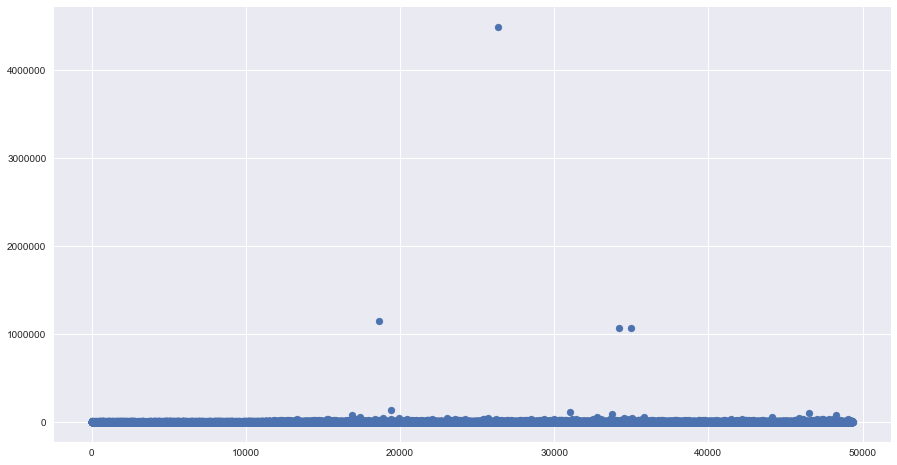

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(range(result.shape[0]),result['price'])

In [19]:
ulimit = np.percentile(result.price.values, 99)
result['price'].ix[result['price']>ulimit] = ulimit

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


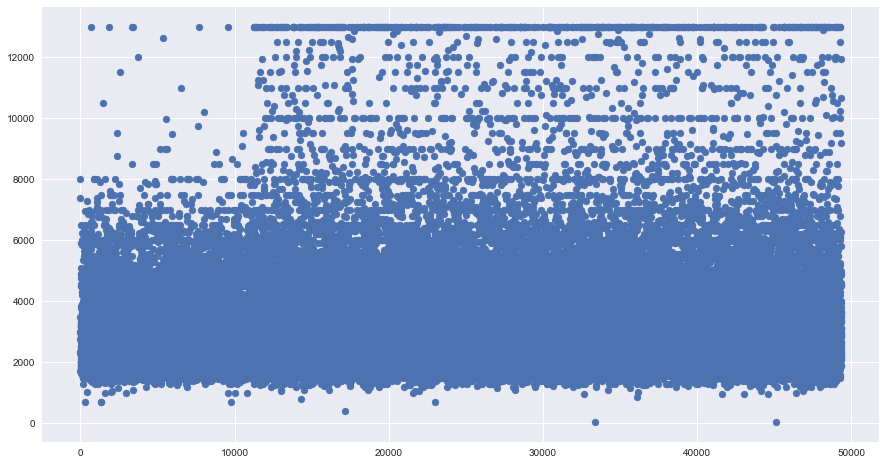

In [20]:
plt.figure(figsize=(15,8))
plt.scatter(range(result.shape[0]),result['price'])

In [21]:
result['int_level'] = result['interest_level'].map({'high': 1, 'low': 0})

In [23]:
number=LabelEncoder()

### There are no null values in the data

In [27]:
result[result.isnull().any(axis=1)]

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created,int_level


In [28]:
result.dtypes

interest_level      object
bedrooms             int64
bathrooms          float64
price              float64
display_address     object
features            object
photos              object
manager_id          object
description         object
latitude           float64
longitude          float64
created             object
int_level            int64
dtype: object

In [29]:
result.head(20000)

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created,int_level
10,high,3,1.5,3000.0,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24,1
100014,high,4,2.0,7995.0,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47,1
100026,high,1,1.0,1725.0,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35,1
100051,high,0,1.0,2350.0,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00,1
100063,high,2,1.0,2999.0,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45,1
10007,high,4,2.0,7400.0,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7,SPRAWLING 2 BEDROOM FOUND! ENJOY THE LUXURY OF...,40.7391,-73.9936,2016-06-07 04:39:56,1
100075,high,1,1.0,2295.0,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e,Don't miss out on this fantastic apartment.......,40.7728,-73.9502,2016-04-25 02:29:50,1
100083,high,0,1.0,2750.0,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1,Enjoy the Upper West Side life-style! This ap...,40.7897,-73.9760,2016-04-21 02:17:28,1
100084,high,2,1.0,3500.0,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c,"--Prime location of the Upper West Side, this ...",40.7902,-73.9678,2016-04-04 04:10:01,1
10010,high,0,1.0,2396.0,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2,Prime Location!! This Luxury Chelsea building ...,40.7530,-73.9959,2016-06-29 04:08:35,1


In [32]:
resulta=result.copy()

In [33]:
#Cleaning the display_address column
resulta['display_address']=resulta.display_address.map(lambda x: " ".join(x.strip("-,.$*!#&\'\t").replace("'",'').lower()\
                                                                         .replace('street', 'st').replace('avenue', 'ave')\
                                                                         .replace('east', 'e').replace('west', 'w').split()))


In [34]:
#Converting display address into numerical value
resulta['display_address']=number.fit_transform(resulta['display_address'].astype('str'))

In [35]:
enc=OneHotEncoder()

In [36]:
enc.fit_transform(resulta['display_address'])

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<1x49352 sparse matrix of type '<class 'numpy.float64'>'
	with 49352 stored elements in Compressed Sparse Row format>

In [37]:
resulta.head()

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created,int_level
10,high,3,1.5,3000.0,4912,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24,1
100014,high,4,2.0,7995.0,5771,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47,1
100026,high,1,1.0,1725.0,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35,1
100051,high,0,1.0,2350.0,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00,1
100063,high,2,1.0,2999.0,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45,1


In [46]:
#Determining the count of features
resulta['feat_count']=resulta['features'].apply(len)

In [47]:
#Determining the count of photos
resulta['photos']=resulta['photos'].apply(len)

In [48]:
#Determining number of words in description
resulta['description'] = resulta["description"].apply(lambda x: len(x.split(" ")))

In [49]:
resulta['created']=pd.to_datetime(resulta['created'])

In [50]:
resulta['created_year']=resulta['created'].dt.year

In [51]:
resulta['created_month']=resulta['created'].dt.month

In [52]:
resulta['created_day']=resulta['created'].dt.day

In [53]:
resulta=resulta.drop(["created"], axis=1)


In [54]:
len(resulta['created_day'].unique())

31

In [55]:
resulta.shape

(49352, 16)

In [56]:
#Finding number of unique manager id
len(resulta['manager_id'].unique())

3481

In [57]:
temp1 = result.groupby('manager_id').count().iloc[:,-1].sort_values(ascending=False)

In [58]:
manager_df=pd.DataFrame(temp1)

In [59]:
manager_df.columns=['train_counts']

In [60]:
manager_df

,train_counts
manager_id,
e6472c7237327dd3903b3d6f6a94515a,2533
6e5c10246156ae5bdcd9b487ca99d96a,711
8f5a9c893f6d602f4953fcc0b8e6e9b4,410
62b685cc0d876c3a1a51d63a0d6a8082,402
cb87dadbca78fad02b388dc9e8f25a5b,373
9df32cb8dda19d3222d66e69e258616b,330
b7de4cb395920136663132057fa89d84,320
2aa9bfa5f67ed9997ea341dee8a3a271,316
ad3d8ddc52c7e0859b5c6c7f7949c3bd,305


In [61]:
len(manager_df[manager_df['train_counts']==1])

969

In [62]:
ix20 = int(len(manager_df['train_counts'].dropna())*0.2)
print("TRAIN: 20% of managers ({0}) responsible for {1:2.2f}% of entries".format(ix20,manager_df['train_counts'].sort_values(ascending = False).cumsum().iloc[ix20]/manager_df['train_counts'].sum()*100))

TRAIN: 20% of managers (696) responsible for 76.16% of entries


In [63]:
resulta['manager_id']=number.fit_transform(resulta['manager_id'].astype('str'))

In [64]:
enc=OneHotEncoder()

In [65]:
enc.fit_transform(resulta['manager_id']).toarray()

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.]])

### The Features that we are using are:
    
Bedrooms:

Bathrooms

Price

Display_address

Number of Features

Number of photos

latitude

Longitude

Manager ID

Created_day

Feature dummy variables

In [69]:
resulta.head(30)

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,int_level,feat_count,created_year,created_month,created_day
10,high,3,1.5,3000.0,4912,[],5,1239,95,40.7145,-73.9425,1,0,2016,6,24
100014,high,4,2.0,7995.0,5771,[],5,2443,9,40.7429,-74.0028,1,0,2016,4,19
100026,high,1,1.0,1725.0,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",5,2653,4,40.8234,-73.9457,1,4,2016,4,20
100051,high,0,1.0,2350.0,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",2,3003,70,40.7439,-73.9743,1,5,2016,4,18
100063,high,2,1.0,2999.0,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",5,3135,43,40.7427,-73.9794,1,9,2016,4,7
10007,high,4,2.0,7400.0,5752,"[Balcony, Doorman, Elevator, Fitness Center, T...",6,179,137,40.7391,-73.9936,1,12,2016,6,7
100075,high,1,1.0,2295.0,4207,"[Dishwasher, Hardwood Floors, No Fee]",6,1089,63,40.7728,-73.9502,1,3,2016,4,25
100083,high,0,1.0,2750.0,1300,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",4,2011,204,40.7897,-73.9760,1,6,2016,4,21
100084,high,2,1.0,3500.0,6096,"[Dining Room, Balcony, Doorman, Elevator, Terr...",8,2590,137,40.7902,-73.9678,1,13,2016,4,4
10010,high,0,1.0,2396.0,5847,"[Roof Deck, Doorman, Elevator, Fitness Center,...",4,1446,81,40.7530,-73.9959,1,14,2016,6,29


In [70]:
x = resulta['features'].tolist()

feature_list = []

for i in range(0,len(x),6169):
    print(i+6169)
    feature_listadd = []
    for j in range(i,i+6169):#len(x)):
        feature_listadd = feature_listadd + x[j]
    feature_list = feature_list + feature_listadd
    
#lowercase is necessary, otherwise matches will be missed when there are differences in case
feature_list = [item.lower() for item in feature_list]
cl = Counter(feature_list)

6169
12338
18507
24676
30845
37014
43183
49352


In [71]:
#Keeping features that occur at least 1,000 times 

feature_list = []

for key in cl:
    if cl[key]>1000:
        feature_list.append(key)
        print(key)

feature_list

cats allowed
dogs allowed
elevator
laundry in building
doorman
fitness center
no fee
hardwood floors
balcony
terrace
high speed internet
dishwasher
outdoor space
pre-war
exclusive
dining room
roof deck
laundry in unit
garden/patio
loft
common outdoor space
wheelchair access
swimming pool
new construction
hardwood
prewar


['cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

### Creating dummy variables for features

In [72]:
for i in feature_list:
    resulta[i] = resulta['features'][:resulta.shape[0]].apply \
        (lambda x: 1 if i in [y.lower() for y in x] else 0)

In [76]:
resulta

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,...,roof deck,laundry in unit,garden/patio,loft,common outdoor space,wheelchair access,swimming pool,new construction,hardwood,prewar
10,high,3,1.5,3000.0,4912,[],5,1239,95,40.7145,...,0,0,0,0,0,0,0,0,0,0
100014,high,4,2.0,7995.0,5771,[],5,2443,9,40.7429,...,0,0,0,0,0,0,0,0,0,0
100026,high,1,1.0,1725.0,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",5,2653,4,40.8234,...,0,0,0,0,0,0,0,0,0,0
100051,high,0,1.0,2350.0,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",2,3003,70,40.7439,...,0,0,0,0,0,0,0,0,0,0
100063,high,2,1.0,2999.0,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",5,3135,43,40.7427,...,0,0,0,0,0,0,0,0,0,0
10007,high,4,2.0,7400.0,5752,"[Balcony, Doorman, Elevator, Fitness Center, T...",6,179,137,40.7391,...,0,0,0,0,0,0,0,0,0,0
100075,high,1,1.0,2295.0,4207,"[Dishwasher, Hardwood Floors, No Fee]",6,1089,63,40.7728,...,0,0,0,0,0,0,0,0,0,0
100083,high,0,1.0,2750.0,1300,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",4,2011,204,40.7897,...,0,0,0,0,0,0,0,0,0,0
100084,high,2,1.0,3500.0,6096,"[Dining Room, Balcony, Doorman, Elevator, Terr...",8,2590,137,40.7902,...,0,0,0,0,0,0,0,0,0,0
10010,high,0,1.0,2396.0,5847,"[Roof Deck, Doorman, Elevator, Fitness Center,...",4,1446,81,40.7530,...,1,1,0,0,0,0,0,0,0,0


In [77]:
cols=list(resulta)

In [78]:
cols.insert(1, cols.pop(cols.index('int_level')))
cols

['interest_level',
 'int_level',
 'bedrooms',
 'bathrooms',
 'price',
 'display_address',
 'features',
 'photos',
 'manager_id',
 'description',
 'latitude',
 'longitude',
 'feat_count',
 'created_year',
 'created_month',
 'created_day',
 'cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

In [79]:
cols.insert(1, cols.pop(cols.index('features')))
cols

['interest_level',
 'features',
 'int_level',
 'bedrooms',
 'bathrooms',
 'price',
 'display_address',
 'photos',
 'manager_id',
 'description',
 'latitude',
 'longitude',
 'feat_count',
 'created_year',
 'created_month',
 'created_day',
 'cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

In [80]:
resulta = resulta.ix[:, cols]
resulta

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,interest_level,features,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,description,...,roof deck,laundry in unit,garden/patio,loft,common outdoor space,wheelchair access,swimming pool,new construction,hardwood,prewar
10,high,[],1,3,1.5,3000.0,4912,5,1239,95,...,0,0,0,0,0,0,0,0,0,0
100014,high,[],1,4,2.0,7995.0,5771,5,2443,9,...,0,0,0,0,0,0,0,0,0,0
100026,high,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",1,1,1.0,1725.0,4621,5,2653,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,"[Doorman, Elevator, Fitness Center, Laundry in...",1,0,1.0,2350.0,3951,2,3003,70,...,0,0,0,0,0,0,0,0,0,0
100063,high,"[Elevator, Central A/C, Walk in Closet(s), Par...",1,2,1.0,2999.0,3932,5,3135,43,...,0,0,0,0,0,0,0,0,0,0
10007,high,"[Balcony, Doorman, Elevator, Fitness Center, T...",1,4,2.0,7400.0,5752,6,179,137,...,0,0,0,0,0,0,0,0,0,0
100075,high,"[Dishwasher, Hardwood Floors, No Fee]",1,1,1.0,2295.0,4207,6,1089,63,...,0,0,0,0,0,0,0,0,0,0
100083,high,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",1,0,1.0,2750.0,1300,4,2011,204,...,0,0,0,0,0,0,0,0,0,0
100084,high,"[Dining Room, Balcony, Doorman, Elevator, Terr...",1,2,1.0,3500.0,6096,8,2590,137,...,0,0,0,0,0,0,0,0,0,0
10010,high,"[Roof Deck, Doorman, Elevator, Fitness Center,...",1,0,1.0,2396.0,5847,4,1446,81,...,1,1,0,0,0,0,0,0,0,0


In [81]:
resulta.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
resulta.rename(columns=lambda x: x.strip().replace("/", "_"), inplace=True)
resulta.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

In [82]:
resulta.describe()

,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,description,latitude,longitude,...,roof_deck,laundry_in_unit,garden_patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
count,49352.000000,49352.000000,49352.00000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,...,49352.000000,49352.000000,49352.000000,49352.000000,49352.00000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,0.305317,1.541640,1.21218,3608.801001,4389.049400,5.606946,1783.531995,90.138272,40.741545,-73.955716,...,0.132821,0.189354,0.039370,0.042572,0.02620,0.027517,0.055317,0.052845,0.021438,0.027334
std,0.460546,1.115018,0.50142,1848.993853,1417.818282,3.632283,1006.158397,59.394230,0.638535,1.177912,...,0.339385,0.391794,0.194476,0.201892,0.15973,0.163585,0.228600,0.223726,0.144840,0.163057
min,0.000000,0.000000,0.00000,43.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-118.271000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.00000,2500.000000,3837.000000,4.000000,886.750000,50.000000,40.728300,-73.991700,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,3150.000000,4290.000000,5.000000,1788.000000,83.000000,40.751800,-73.977900,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.00000,4100.000000,5627.000000,7.000000,2731.000000,120.000000,40.774300,-73.954800,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,10.00000,13000.000000,6330.000000,68.000000,3480.000000,667.000000,44.883500,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
resulta.dtypes


interest_level           object
features                 object
int_level                 int64
bedrooms                  int64
bathrooms               float64
price                   float64
display_address           int64
photos                    int64
manager_id                int64
description               int64
latitude                float64
longitude               float64
feat_count                int64
created_year              int64
created_month             int64
created_day               int64
cats_allowed              int64
dogs_allowed              int64
elevator                  int64
laundry_in_building       int64
doorman                   int64
fitness_center            int64
no_fee                    int64
hardwood_floors           int64
balcony                   int64
terrace                   int64
high_speed_internet       int64
dishwasher                int64
outdoor_space             int64
pre_war                   int64
exclusive                 int64
dining_r

In [88]:
resulta.head()


,interest_level,features,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,description,...,roof_deck,laundry_in_unit,garden_patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
10,high,[],1,3,1.5,3000.0,4912,5,1239,95,...,0,0,0,0,0,0,0,0,0,0
100014,high,[],1,4,2.0,7995.0,5771,5,2443,9,...,0,0,0,0,0,0,0,0,0,0
100026,high,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",1,1,1.0,1725.0,4621,5,2653,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,"[Doorman, Elevator, Fitness Center, Laundry in...",1,0,1.0,2350.0,3951,2,3003,70,...,0,0,0,0,0,0,0,0,0,0
100063,high,"[Elevator, Central A/C, Walk in Closet(s), Par...",1,2,1.0,2999.0,3932,5,3135,43,...,0,0,0,0,0,0,0,0,0,0


In [104]:
train=resulta.columns[3:]

In [129]:
train

Index(['bedrooms', 'bathrooms', 'price', 'display_address', 'photos',
       'manager_id', 'description', 'latitude', 'longitude', 'feat_count',
       'created_year', 'created_month', 'created_day', 'cats_allowed',
       'dogs_allowed', 'elevator', 'laundry_in_building', 'doorman',
       'fitness_center', 'no_fee', 'hardwood_floors', 'balcony', 'terrace',
       'high_speed_internet', 'dishwasher', 'outdoor_space', 'pre_war',
       'exclusive', 'dining_room', 'roof_deck', 'laundry_in_unit',
       'garden_patio', 'loft', 'common_outdoor_space', 'wheelchair_access',
       'swimming_pool', 'new_construction', 'hardwood', 'prewar'],
      dtype='object')

In [130]:
logit = sm.Logit(resulta['int_level'], resulta[train])

In [131]:
final=logit.fit()

Optimization terminated successfully.
         Current function value: 0.523208
         Iterations 7


In [132]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              int_level   No. Observations:                49352
Model:                          Logit   Df Residuals:                    49313
Method:                           MLE   Df Model:                           38
Date:                Thu, 25 May 2017   Pseudo R-squ.:                  0.1497
Time:                        14:43:58   Log-Likelihood:                -25821.
converged:                       True   LL-Null:                       -30366.
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms                 0.5684      0.014     40.678      0.000       0.541       0.596
bathrooms                0.3741      0.036     10.343      0.000       0.303       0.445
price                   -0.0009   1.59e-05    -58.288      0.000      -0.001      -0.001
display_address      -5.542e-05   7.82e-06     -7.082      0.000   -7.08e-05   -4.01e-05
photos                   0.0190      0.004      5.415      0.000       0.012       0.026
manager_id            5.931e-05   1.11e-05      5.350      0.000    3.76e-05     8.1e-05
description              0.0014      0.000      6.597      0.000       0.001       0.002
latitude                -0.4267      0.150     -2.853      0.004      -0.720      -0.134
longitude               -0.2528      0.082     -3.064      0.002      -0.414      -0.091
feat_count               0.0712      0.010      7.386      0.000       0.052       0.090
created_year            -0.0005      0.000     -0.951      0.341      -0.001       0.000
created_month           -0.0018      0.013     -0.136      0.892      -0.027       0.024
created_day             -0.0063      0.001     -4.865      0.000      -0.009      -0.004
cats_allowed            -0.0201      0.060     -0.336      0.737      -0.137       0.097
dogs_allowed            -0.1869      0.061     -3.064      0.002      -0.306      -0.067
elevator                -0.0265      0.033     -0.813      0.416      -0.090       0.037
laundry_in_building      0.3132      0.031      9.961      0.000       0.252       0.375
doorman                 -0.2528      0.035     -7.144      0.000      -0.322      -0.183
fitness_center          -0.2937      0.040     -7.389      0.000      -0.372      -0.216
no_fee                   0.4751      0.027     17.277      0.000       0.421       0.529
hardwood_floors          0.3164      0.031     10.341      0.000       0.256       0.376
balcony                 -0.0289      0.054     -0.538      0.591      -0.134       0.076
terrace                 -0.0073      0.063     -0.115      0.908      -0.131       0.117
high_speed_internet      0.1152      0.048      2.418      0.016       0.022       0.209
dishwasher               0.0267      0.032      0.838      0.402      -0.036       0.089
outdoor_space            0.0698      0.043      1.614      0.107      -0.015       0.154
pre_war                 -0.3748      0.030    -12.416      0.000      -0.434      -0.316
exclusive                0.0078      0.058      0.136      0.892      -0.105       0.121
dining_room              0.0994      0.040      2.492      0.013       0.021       0.178
roof_deck               -0.1113      0.042     -2.654      0.008      -0.194      -0.029
laundry_in_unit          0.1812      0.033      5.517      0.000       0.117       0.246
garden_patio            -0.0401      0.063     -0.634      0.526      -0.164       0.084
loft                     0.2687      0.053      5.036      0.000       0.164       0.373
common_outdoor_space     0.4476      

In [133]:
resulta.groupby('interest_level').mean()


,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,description,latitude,longitude,...,roof_deck,laundry_in_unit,garden_patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
interest_level,,,,,,,,,,,,,,,,,,,,,
high,1.0,1.602801,1.151745,3034.962702,4206.565171,5.794200,1711.888904,96.083754,40.746188,-73.964926,...,0.146602,0.208057,0.048115,0.048978,0.032785,0.030329,0.056743,0.059862,0.013671,0.010685
low,0.0,1.514759,1.238741,3861.005979,4469.252188,5.524647,1681.562420,87.525201,40.739504,-73.951667,...,0.126765,0.181134,0.035527,0.039756,0.023305,0.026280,0.054690,0.049761,0.024851,0.034652


### Performing Logistic regression using sklearn

In [134]:
from sklearn.preprocessing import scale

In [331]:
y, X = dmatrices('int_level ~  +bedrooms + bathrooms + price + display_address + photos + manager_id  + latitude + longitude + feat_count + created_day + cats_allowed + dogs_allowed + elevator + laundry_in_building + doorman + fitness_center + no_fee +  hardwood_floors + balcony + terrace + high_speed_internet + dishwasher + outdoor_space + prewar + exclusive + dining_room + roof_deck + laundry_in_unit + garden_patio + loft + common_outdoor_space + wheelchair_access + swimming_pool + new_construction + hardwood' , resulta, return_type="dataframe")

In [332]:
resulta.columns[3:-1]

Index(['bedrooms', 'bathrooms', 'price', 'display_address', 'photos',
       'manager_id', 'description', 'latitude', 'longitude', 'feat_count',
       'created_year', 'created_month', 'created_day', 'cats_allowed',
       'dogs_allowed', 'elevator', 'laundry_in_building', 'doorman',
       'fitness_center', 'no_fee', 'hardwood_floors', 'balcony', 'terrace',
       'high_speed_internet', 'dishwasher', 'outdoor_space', 'pre_war',
       'exclusive', 'dining_room', 'roof_deck', 'laundry_in_unit',
       'garden_patio', 'loft', 'common_outdoor_space', 'wheelchair_access',
       'swimming_pool', 'new_construction', 'hardwood'],
      dtype='object')

In [333]:
y = np.ravel(y)

In [232]:
model = LogisticRegression(penalty='l2',C=.01,fit_intercept = True)
model = model.fit(X, y)

#### What are the coefficients?

In [233]:
#examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-1.81252173358e-07]
1,bedrooms,[0.589047659592]
2,bathrooms,[0.138059475945]
3,price,[-0.000852179543586]
4,display_address,[-8.55623854083e-05]
5,photos,[0.03142512552]
6,manager_id,[4.82901010092e-05]
7,latitude,[-0.00591621997506]
8,longitude,[-0.0230180936612]
9,feat_count,[0.0509298188919]


In [236]:
model.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [237]:
model.intercept_

array([ -1.81252173e-07])

In [238]:
model.coef_

array([[ -1.81252173e-07,   5.89047660e-01,   1.38059476e-01,
         -8.52179544e-04,  -8.55623854e-05,   3.14251255e-02,
          4.82901010e-05,  -5.91621998e-03,  -2.30180937e-02,
          5.09298189e-02,  -3.65404346e-04,  -1.86122041e-02,
         -6.78426384e-03,  -1.59584660e-01,  -1.72470227e-01,
          3.62226707e-04,   1.68915172e-01,  -9.57138222e-02,
         -7.60525210e-02,   3.07421112e-01,   3.02869361e-01,
          2.51113198e-02,   2.78683202e-02,   1.98265311e-02,
          1.48788585e-01,   7.85245679e-02,  -1.26945371e-01,
         -2.61237706e-03,   8.26785421e-02,  -1.30726113e-02,
          1.26110856e-01,   2.12159728e-02,   3.65003570e-02,
          3.14779498e-02,  -5.89987873e-03,   4.18474094e-03,
         -1.37491927e-02,  -1.12235010e-01]])

### Model evaluation using validation set

In [335]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [336]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [337]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[ 1.  0.  0. ...,  1.  0.  0.]


In [338]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[ 0.40347101  0.59652899]
 [ 0.72068187  0.27931813]
 [ 0.68613593  0.31386407]
 ..., 
 [ 0.47547541  0.52452459]
 [ 0.78312039  0.21687961]
 [ 0.77286695  0.22713305]]


In [339]:
pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_))))

,0,1
0,Intercept,[-0.000371118713734]
1,bedrooms,[0.516605204231]
2,bathrooms,[0.113346267223]
3,price,[-0.000792850683095]
4,display_address,[-8.98269564466e-05]
5,photos,[0.020197295969]
6,manager_id,[4.96439127848e-05]
7,latitude,[-0.00352807469433]
8,longitude,[-0.0112054118763]
9,feat_count,[0.0604304674276]


### Confusion Matrix for Logistic Regression

In [348]:
#Confusion matrix
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[9478  790]
 [3360 1178]]
             precision    recall  f1-score   support

        0.0       0.74      0.92      0.82     10268
        1.0       0.60      0.26      0.36      4538

avg / total       0.70      0.72      0.68     14806



### Model evaluation using cross validation

In [167]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.71353323  0.68192869  0.71515397  0.70482172  0.70658561  0.7177305
  0.7112462   0.72847011  0.72071342  0.73692744]
0.713711088212


### Support vector machine(SVM)

In [171]:
resulta.head(10)

,interest_level,features,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,description,...,roof_deck,laundry_in_unit,garden_patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
10,high,[],1,3,1.5,3000.0,4912,5,1868,95,...,0,0,0,0,0,0,0,0,0,0
100014,high,[],1,4,2.0,7995.0,5771,5,676,9,...,0,0,0,0,0,0,0,0,0,0
100026,high,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",1,1,1.0,1725.0,4621,5,934,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,"[Doorman, Elevator, Fitness Center, Laundry in...",1,0,1.0,2350.0,3951,2,1368,70,...,0,0,0,0,0,0,0,0,0,0
100063,high,"[Elevator, Central A/C, Walk in Closet(s), Par...",1,2,1.0,2999.0,3932,5,1530,43,...,0,0,0,0,0,0,0,0,0,0
10007,high,"[Balcony, Doorman, Elevator, Fitness Center, T...",1,4,2.0,7400.0,5752,6,3347,137,...,0,0,0,0,0,0,0,0,0,0
100075,high,"[Dishwasher, Hardwood Floors, No Fee]",1,1,1.0,2295.0,4207,6,14,63,...,0,0,0,0,0,0,0,0,0,0
100083,high,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",1,0,1.0,2750.0,1300,4,144,204,...,0,0,0,0,0,0,0,0,0,0
100084,high,"[Dining Room, Balcony, Doorman, Elevator, Terr...",1,2,1.0,3500.0,6096,8,856,137,...,0,0,0,0,0,0,0,0,0,0
10010,high,"[Roof Deck, Doorman, Elevator, Fitness Center,...",1,0,1.0,2396.0,5847,4,2924,81,...,1,1,0,0,0,0,0,0,0,0


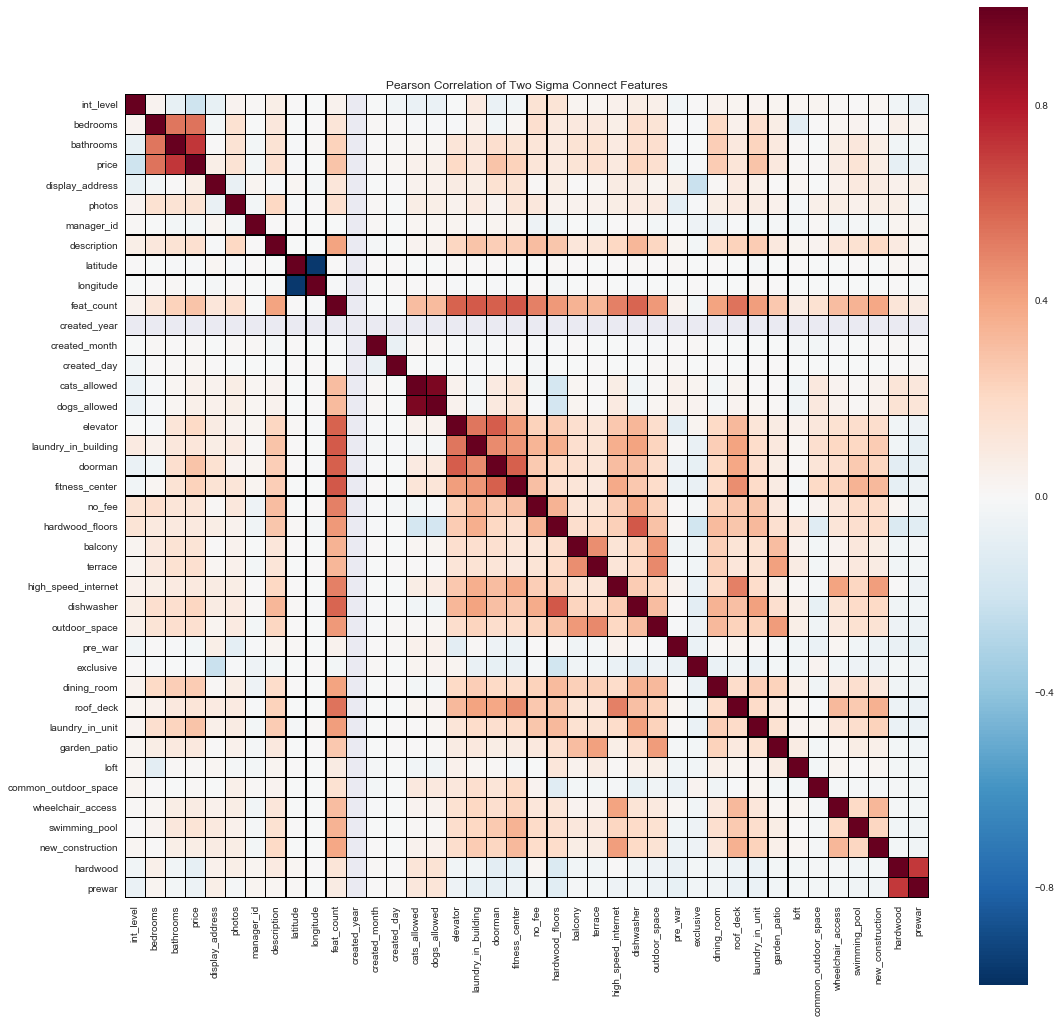

In [172]:
#Creating 
plt.figure(figsize=(18, 18))
plt.title('Pearson Correlation of Two Sigma Connect Features')
# Draw the heatmap using seaborn
sns.heatmap(resulta.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black')

In [220]:
y, X = dmatrices('int_level ~  +bedrooms + bathrooms + price + display_address+ photos + manager_id + feat_count + created_day + latitude + longitude + cats_allowed + dogs_allowed + elevator + laundry_in_building + doorman + fitness_center + no_fee +  hardwood_floors + balcony + terrace + high_speed_internet + dishwasher + outdoor_space + prewar + exclusive + dining_room + roof_deck + laundry_in_unit + garden_patio + loft + common_outdoor_space + wheelchair_access + swimming_pool + new_construction + hardwood' , resulta, return_type="dataframe")

In [221]:
X.columns

Index(['Intercept', 'bedrooms', 'bathrooms', 'price', 'display_address',
       'photos', 'manager_id', 'feat_count', 'created_day', 'created_month',
       'latitude', 'longitude', 'cats_allowed', 'dogs_allowed', 'elevator',
       'laundry_in_building', 'doorman', 'fitness_center', 'no_fee',
       'hardwood_floors', 'balcony', 'terrace', 'high_speed_internet',
       'dishwasher', 'outdoor_space', 'prewar', 'exclusive', 'dining_room',
       'roof_deck', 'laundry_in_unit', 'garden_patio', 'loft',
       'common_outdoor_space', 'wheelchair_access', 'swimming_pool',
       'new_construction', 'hardwood'],
      dtype='object')

In [222]:
from sklearn import svm

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [224]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [188]:
modelsvm = svm.LinearSVC(class_weight='balanced')

In [189]:
modelsvm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [190]:
modelsvm.intercept_

array([  5.01128699e-06])

In [302]:
modelsvm.coef_

array([[ -4.89318682e-05,   1.26328281e-01,   3.00653090e-02,
         -5.59199802e-04,  -3.18395628e-04,   2.68653948e-04,
          8.36353503e-03,   2.39353849e-04,   8.07835788e-04,
         -5.58755596e-03,   2.30034124e-02,  -2.26064784e-03,
         -1.93196248e-02,  -2.27445963e-02,  -7.73440506e-03,
          1.87332423e-02,  -1.89345887e-02,  -9.96064968e-03,
          4.14375320e-02,   3.74092595e-02,   6.04144711e-03,
          4.53047410e-03,   5.97948459e-03,   2.00386935e-02,
          1.19333955e-02,  -1.39764778e-02,  -3.39625706e-03,
          1.22234122e-02,   2.13683569e-03,   1.70497353e-02,
          4.75028003e-03,   1.81602422e-03,   5.02417792e-03,
          1.17312620e-04,   3.03521988e-03,   9.35928640e-05,
         -1.22775389e-02]])

In [203]:
#For prediction
ypred=modelsvm.predict(X_test)

In [204]:
#from sklearn.metrics import f1_score

In [205]:
#print (metrics.accuracy_score(y_test, ypred))

### Confusion Matrix for Linear SVM

In [206]:
#Confusiion Matrix
print (metrics.confusion_matrix(y_test, ypred))
print (metrics.classification_report(y_test, ypred))

[[    0 10268]
 [    0  4538]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00     10268
        1.0       0.31      1.00      0.47      4538

avg / total       0.09      0.31      0.14     14806



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Using RBF Kernel in SVM

In [207]:
#with rbf kernel
svmrbf = svm.SVC(class_weight='balanced')

In [208]:
svmrbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [209]:
ypred1=svmrbf.predict(X_test)

### Confusion Matrix for SVM with RBF kernel

In [210]:
print (metrics.confusion_matrix(y_test, ypred1))
print (metrics.classification_report(y_test, ypred1))

[[10101   167]
 [ 4166   372]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.82     10268
        1.0       0.69      0.08      0.15      4538

avg / total       0.70      0.71      0.62     14806



### Implementing XGBoost Model

In [225]:
import xgboost as xgb

In [226]:
from xgboost import XGBClassifier

In [227]:
XGB = xgb.XGBClassifier()

In [228]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [229]:
ypred3 = XGB.predict(X_test)

### Confusion Matrix for XGBoost

In [230]:
print (metrics.confusion_matrix(y_test, ypred3))
print (metrics.classification_report(y_test, ypred3))

[[9415  853]
 [2633 1905]]
             precision    recall  f1-score   support

        0.0       0.78      0.92      0.84     10268
        1.0       0.69      0.42      0.52      4538

avg / total       0.75      0.76      0.75     14806

